In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

LOAD GAMBAR

In [27]:
# Baca gambar
image = cv2.imread("nama.jpg")  # Ganti dengan path gambar And

In [28]:
# Konversi gambar ke skema warna HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

In [29]:
# Definisikan batas-batas warna untuk merah, hijau, dan biru dalam skema warna HSV
lower_red = np.array([0, 100, 100])
upper_red = np.array([10, 255, 255])

lower_green = np.array([50, 100, 100])
upper_green = np.array([70, 255, 255])

lower_blue = np.array([110, 100, 100])
upper_blue = np.array([130, 255, 255])

In [30]:
# Buat mask untuk setiap warna
mask_red = cv2.inRange(hsv, lower_red, upper_red)
mask_green = cv2.inRange(hsv, lower_green, upper_green)
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)

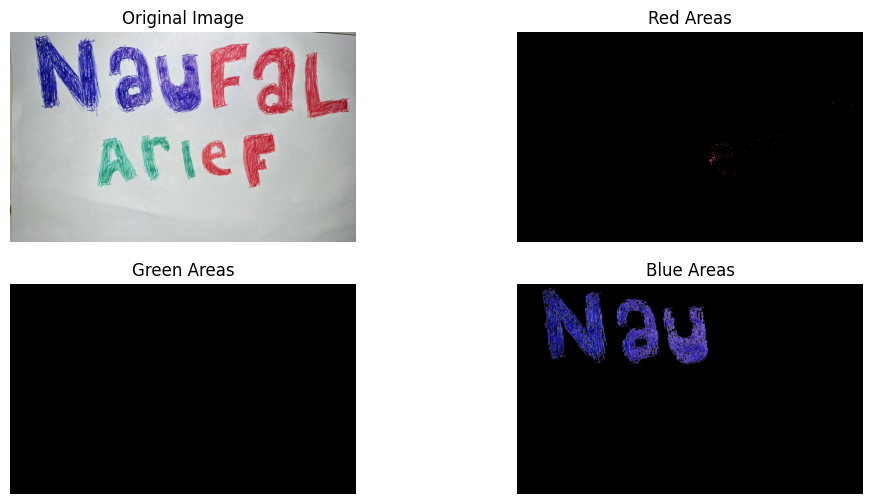

In [31]:
# Gabungkan mask dengan gambar asli
result_red = cv2.bitwise_and(image, image, mask=mask_red)
result_green = cv2.bitwise_and(image, image, mask=mask_green)
result_blue = cv2.bitwise_and(image, image, mask=mask_blue)

# Tampilkan gambar dan area yang memiliki warna tertentu dalam satu jendela figur
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(result_red, cv2.COLOR_BGR2RGB))
plt.title('Red Areas')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(result_green, cv2.COLOR_BGR2RGB))
plt.title('Green Areas')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(result_blue, cv2.COLOR_BGR2RGB))
plt.title('Blue Areas')
plt.axis('off')

plt.show()


HISTOGRAM

In [32]:
# Ambil saluran warna terpisah untuk histogram
red_channel = image[:,:,2]
green_channel = image[:,:,1]
blue_channel = image[:,:,0]

GAMBAR HISTOGRAM

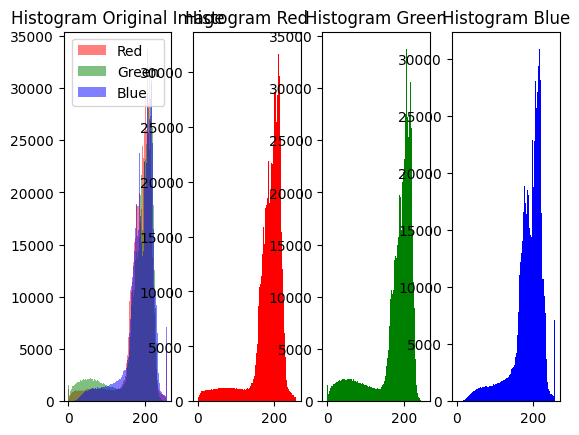

<Figure size 1200x600 with 0 Axes>

In [40]:
# Histogram gambar asli
plt.subplot(1, 4, 1)
plt.hist(red_channel.ravel(), 256, [0, 256], color='red', alpha=0.5)
plt.hist(green_channel.ravel(), 256, [0, 256], color='green', alpha=0.5)
plt.hist(blue_channel.ravel(), 256, [0, 256], color='blue', alpha=0.5)
plt.title('Histogram Original Image')
plt.legend(['Red', 'Green', 'Blue'])

# Tampilkan histogram merah
plt.subplot(1, 4, 2)
plt.hist(red_channel.ravel(), 256, [0, 256], color='red')
plt.title('Histogram Red')

# Tampilkan histogram hijau
plt.subplot(1, 4, 3)
plt.hist(green_channel.ravel(), 256, [0, 256], color='green')
plt.title('Histogram Green')

# Tampilkan histogram biru
plt.subplot(1, 4, 4)
plt.hist(blue_channel.ravel(), 256, [0, 256], color='blue')
plt.title('Histogram Blue')

# Buat figure untuk gambar histogram
plt.figure(figsize=(12, 6))

plt.tight_layout(pad=3.0)
plt.show()

COLOR RECOGNATION

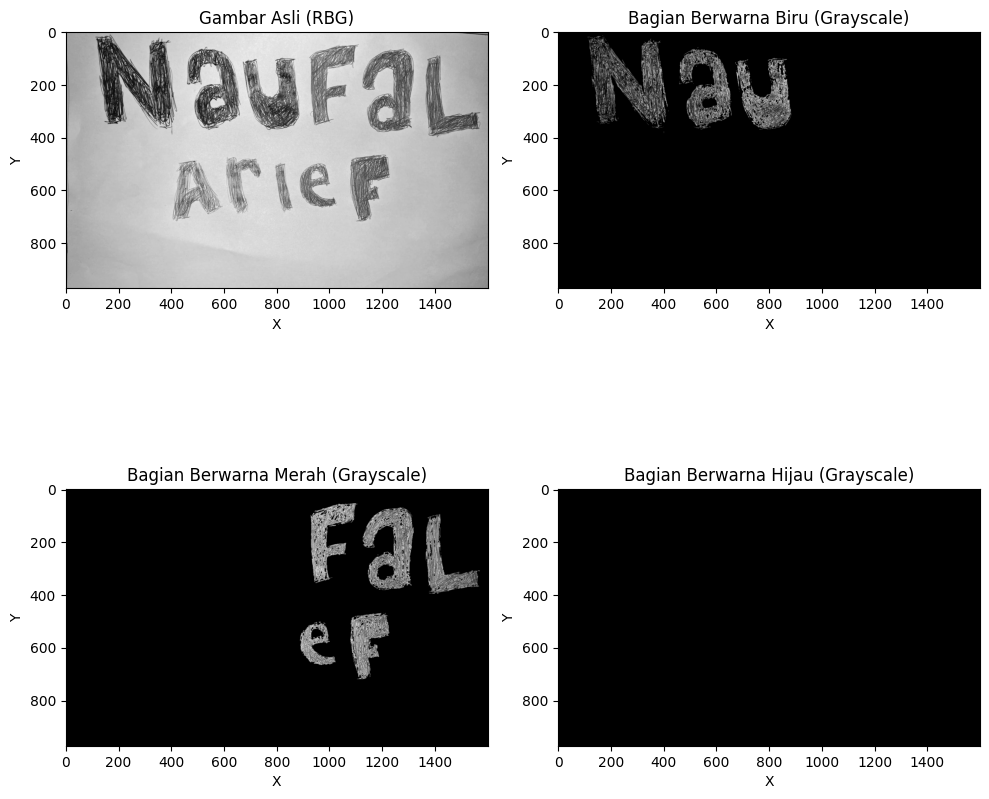

In [34]:

def identify_colors(image_path):
    # Baca gambar
    image = cv2.imread(image_path)
    
    # Konversi citra ke ruang warna HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Definisikan rentang warna untuk warna biru, merah, dan hijau dalam skema HSV
    lower_blue = np.array([110, 100, 100])
    upper_blue = np.array([130, 255, 255])

    lower_red1 = np.array([0, 100, 100])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([160, 100, 100])
    upper_red2 = np.array([180, 255, 255])

    lower_green = np.array([50, 100, 100])
    upper_green = np.array([70, 255, 255])

    # Buat mask untuk setiap warna
    mask_blue = cv2.inRange(hsv_image, lower_blue, upper_blue)
    mask_red1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
    mask_red2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
    mask_red = cv2.bitwise_or(mask_red1, mask_red2)
    mask_green = cv2.inRange(hsv_image, lower_green, upper_green)

    # Gabungkan hasil mask untuk setiap warna
    result_blue = cv2.bitwise_and(image, image, mask=mask_blue)
    result_red = cv2.bitwise_and(image, image, mask=mask_red)
    result_green = cv2.bitwise_and(image, image, mask=mask_green)

    return result_blue, result_red, result_green

# Path gambar
image_path = "nama.jpg"  # Ganti dengan path gambar Anda

# Lakukan identifikasi warna
blue_area, red_area, green_area = identify_colors(image_path)

# Baca gambar asli
original_image = cv2.imread(image_path)

# Konversi gambar asli ke grayscale
gray_original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Tampilkan hasil dalam sebuah figure
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Tampilkan gambar asli dalam grayscale
ax[0, 0].imshow(gray_original_image, cmap='gray')
ax[0, 0].set_title("Gambar Asli (RBG)")
ax[0, 0].set_xlabel("X")
ax[0, 0].set_ylabel("Y")

# Tampilkan citra yang diidentifikasi sebagai warna biru dalam grayscale
blue_gray = cv2.cvtColor(blue_area, cv2.COLOR_BGR2GRAY)
ax[0, 1].imshow(blue_gray, cmap='gray')
ax[0, 1].set_title("Bagian Berwarna Biru (Grayscale)")
ax[0, 1].set_xlabel("X")
ax[0, 1].set_ylabel("Y")

# Tampilkan citra yang diidentifikasi sebagai warna merah dalam grayscale
red_gray = cv2.cvtColor(red_area, cv2.COLOR_BGR2GRAY)
ax[1, 0].imshow(red_gray, cmap='gray')
ax[1, 0].set_title("Bagian Berwarna Merah (Grayscale)")
ax[1, 0].set_xlabel("X")
ax[1, 0].set_ylabel("Y")

# Tampilkan citra yang diidentifikasi sebagai warna hijau dalam grayscale
green_gray = cv2.cvtColor(green_area, cv2.COLOR_BGR2GRAY)
ax[1, 1].imshow(green_gray, cmap='gray')
ax[1, 1].set_title("Bagian Berwarna Hijau (Grayscale)")
ax[1, 1].set_xlabel("X")
ax[1, 1].set_ylabel("Y")

plt.tight_layout()
plt.show()
